In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np

tGlobal = pd.read_csv('/Users/nathanlee/Documents/Spotify/GlobalTop50.csv')
tGlobal['playlist'] = "Global"
tAustralia = pd.read_csv('/Users/nathanlee/Documents/Spotify/AustraliaTop50.csv')
tAustralia['playlist'] = "Australia"
tBelgium = pd.read_csv('/Users/nathanlee/Documents/Spotify/BelgiumTop50.csv')
tBelgium['playlist'] = "Belgium"
tBrazil = pd.read_csv('/Users/nathanlee/Documents/Spotify/BrazilTop50.csv')
tBrazil['playlist'] = "Brazil"
tEcuador = pd.read_csv('/Users/nathanlee/Documents/Spotify/EcuadorTop50.csv')
tEcuador['playlist'] = "Ecuador"
tIndia = pd.read_csv('/Users/nathanlee/Documents/Spotify/IndiaTop50.csv')
tIndia['playlist'] = "India"
tJapan = pd.read_csv('/Users/nathanlee/Documents/Spotify/JapanTop50.csv')
tJapan['playlist'] = "Japan"
tSpain = pd.read_csv('/Users/nathanlee/Documents/Spotify/SpainTop50.csv')
tSpain['playlist'] = "Spain"
tUS = pd.read_csv('/Users/nathanlee/Documents/Spotify/USTop50.csv')
tUS['playlist'] = "US"
tVietnam = pd.read_csv('/Users/nathanlee/Documents/Spotify/VietnamTop50.csv')
tVietnam['playlist'] = "Vietnam"
frames = [tGlobal,tAustralia,tBelgium,tBrazil,tEcuador,tIndia,tJapan,tSpain,tUS,tVietnam]
complete_list = pd.concat(frames)

In [2]:
def adjust_loudness(df):
    max_db = df['loudness'].max()
    min_db = df['loudness'].min()
    df['loudness'] = df['loudness'].apply(lambda x: (x-min_db)/(max_db - min_db))
    
adjust_loudness(complete_list)
complete_list = complete_list.drop(["Unnamed: 0"], axis = 1)

# Spotify Top 50 Analysis

I use Spotify almost daily and constantly browse past the Top 50 playlists from each country. Naturally, I clicked and listened to a few songs from France and Spain playlists. Beyond the lyrics and choice of instruments, some of the unique songs on the playlists sounded similar to the US songs I had heard before. Then I wondered how similar the Top 50 lists were in terms of musical qualities to really see if music is a "universal language". Alongside the Global and US playlists, I randomly chose a few of the Top 50 playlists to analyze and scraped them. The following visuals and trends were the results.

## Features of Songs

Each song on Spotify has defined charactersitics about their audio qualities. Spotify defines the following features of songs as:
(All are on a scale of 0 to 1.0 or adjusted to that scale)

- __Acousticness__ — A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- __Danceability__ — Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- __Energy__ — Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 
- __Instrumentalness__ — Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. 
- __Liveness__ — Detects the presence of an audience in the recording.
- __Loudness__ — The overall loudness of a track in decibels (dB).
- __Speechiness__ — Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- __Valence__ — A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- __Tempo__ — The overall estimated tempo of a track in beats per minute (BPM). 

In [56]:
def radar_plot(row, title, color):
    categories=list(complete_list)[6:14]
    N = len(categories)
    angles = [2 * pi * n / float(N) for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(1,3,row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4", "0.6", "0.8"], color="grey", size=5)
    plt.ylim(0,1.0)
    
    values=df_concat.iloc[row].drop('name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color = color[row], linewidth=2, linestyle='solid')
    ax.fill(angles, values, color = color[row], alpha=0.4)
    
    plt.title(title, size=11, y=1.1)


In [28]:
df_concat = pd.concat([complete_list.iloc[[132, 355, 477], 0], complete_list.iloc[[132, 355, 477], 6:14]], axis=1)
df_concat

,name,danceability,acousticness,energy,instrumentalness,liveness,loudness,valence,speechiness
32,Dynamite,0.746,0.0112,0.765,0.000000,0.0936,0.707357,0.737,0.0993
5,La Curiosidad,0.845,0.2690,0.677,0.000917,0.1080,0.688174,0.680,0.1360
27,Đốt,0.710,0.8250,0.420,0.000054,0.1130,0.622169,0.279,0.0347


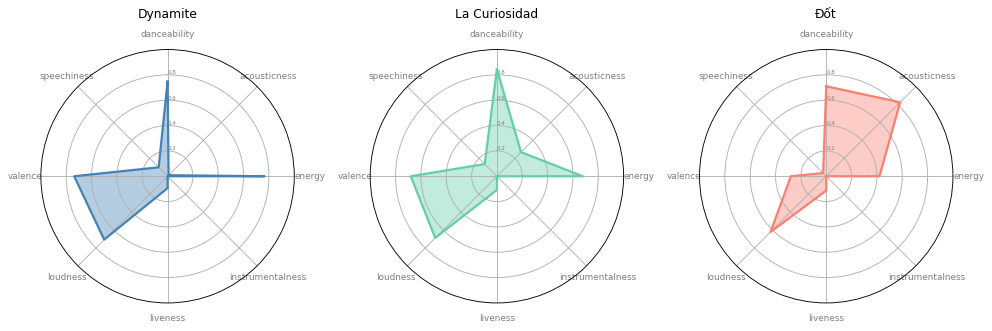

In [60]:
colors = ["steelblue", "mediumaquamarine", "salmon"]
my_dpi=80
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

for row in range(0, len(df_concat.index)):
    radar_plot(row=row, title= df_concat['name'].iloc[row], color=colors)
    
plt.tight_layout()

## Top 50 Playlists Overview

### Song Characteristics Breakdown

Even after dropping duplicates from each playlist, we still notice that the top songs amongst the different playlists share common features across the board such as low instrumentalness, low liveness, high danceability, high energy, and more. However, there is a good amount of deviation from the mean across all categories, suggesting a wider range of songs among their respective Top 50 playlists. Despite this, it does seem that there are commonalities between popular songs across the world despite cultural and lingusitic differences (Or this is at least the narrative that their respective music industries push on Spotify).

In [7]:
complete_list.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,valence,speechiness,tempo,time_signature,mode,key,playlist
0,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),Cardi B,2020-08-07,187541,99,0.935,0.01940,0.454,0.000000,0.0824,0.554138,0.357,0.3750,133.073,4,1,1,Global
1,Hawái,PAPI JUANCHO,Maluma,2020-08-21,199112,85,0.783,0.18500,0.727,0.000025,0.0626,0.754623,0.558,0.3890,180.067,4,0,6,Global
2,Mood (feat. Iann Dior),Mood (feat. Iann Dior),24kGoldn,2020-07-24,140525,96,0.700,0.22100,0.722,0.000000,0.2720,0.749481,0.756,0.0369,90.989,4,0,7,Global
3,Dynamite,Dynamite,BTS,2020-08-28,199053,83,0.746,0.01120,0.765,0.000000,0.0936,0.707357,0.737,0.0993,114.044,4,0,6,Global
4,Blinding Lights,After Hours,The Weeknd,2020-03-20,200040,99,0.514,0.00146,0.730,0.000095,0.0897,0.632008,0.334,0.0598,171.005,4,1,1,Global


In [3]:
no_duplicates_list = complete_list.drop_duplicates(subset = ["name"])

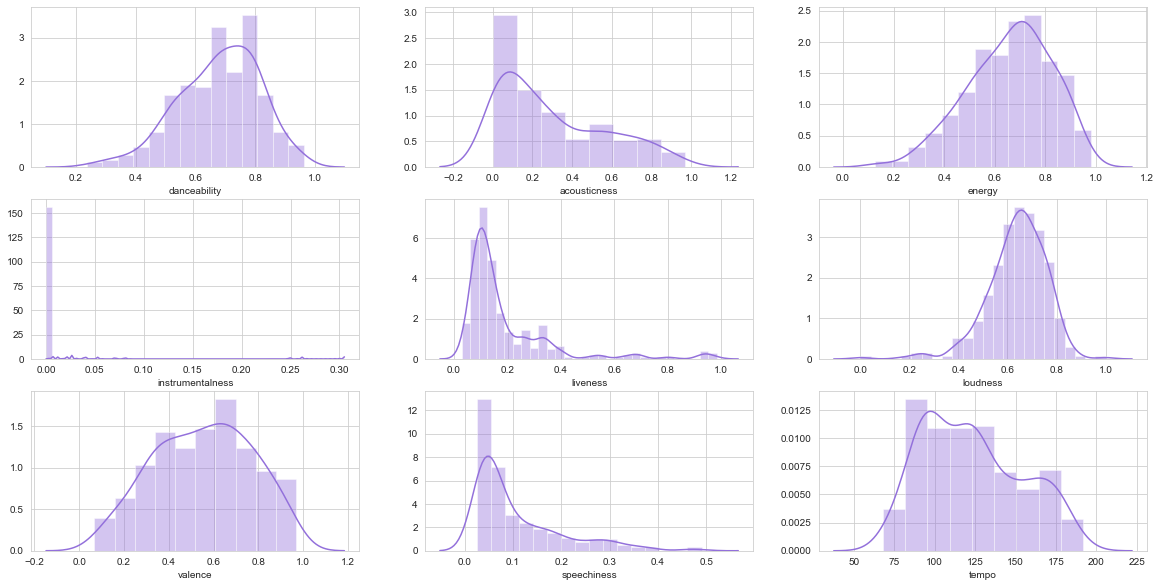

In [109]:
characteristics = no_duplicates_list.iloc[:, 6:15]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20,10))
sns.set_style("whitegrid")
for i, ax in enumerate(axes.flatten()):
    sns.distplot(characteristics.iloc[:, i], color="mediumpurple", ax = ax)

In [110]:
no_duplicates_list.iloc[:, 6:15].mean(axis = 0)

danceability          0.677964
acousticness          0.299949
energy                0.658907
instrumentalness      0.003840
liveness              0.187416
loudness              0.639132
valence               0.552754
speechiness           0.107188
tempo               123.170453
dtype: float64

In [111]:
no_duplicates_list.iloc[:, 6:15].std(axis = 0)

danceability         0.136291
acousticness         0.267801
energy               0.165531
instrumentalness     0.026828
liveness             0.172079
loudness             0.119207
valence              0.216946
speechiness          0.092567
tempo               30.419143
dtype: float64

### Mode, Key, and Time Signature

The mode, key, and time signatures are interesting features for the songs as we see little variability in terms of time signature of the songs. The keys of the songs are fairly diverse, incorporating all possible keys. Meanwhile, the mode of the songs leans major, but does not shy away from utilizing a minor modality.

In [113]:
complete_list["key"] = complete_list["key"].replace([0,1,2,3,4,5,6,7,8,9,10,11], ['C', "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"])
complete_list["mode"] = complete_list["mode"].replace([0,1], ['Minor', "Major"])

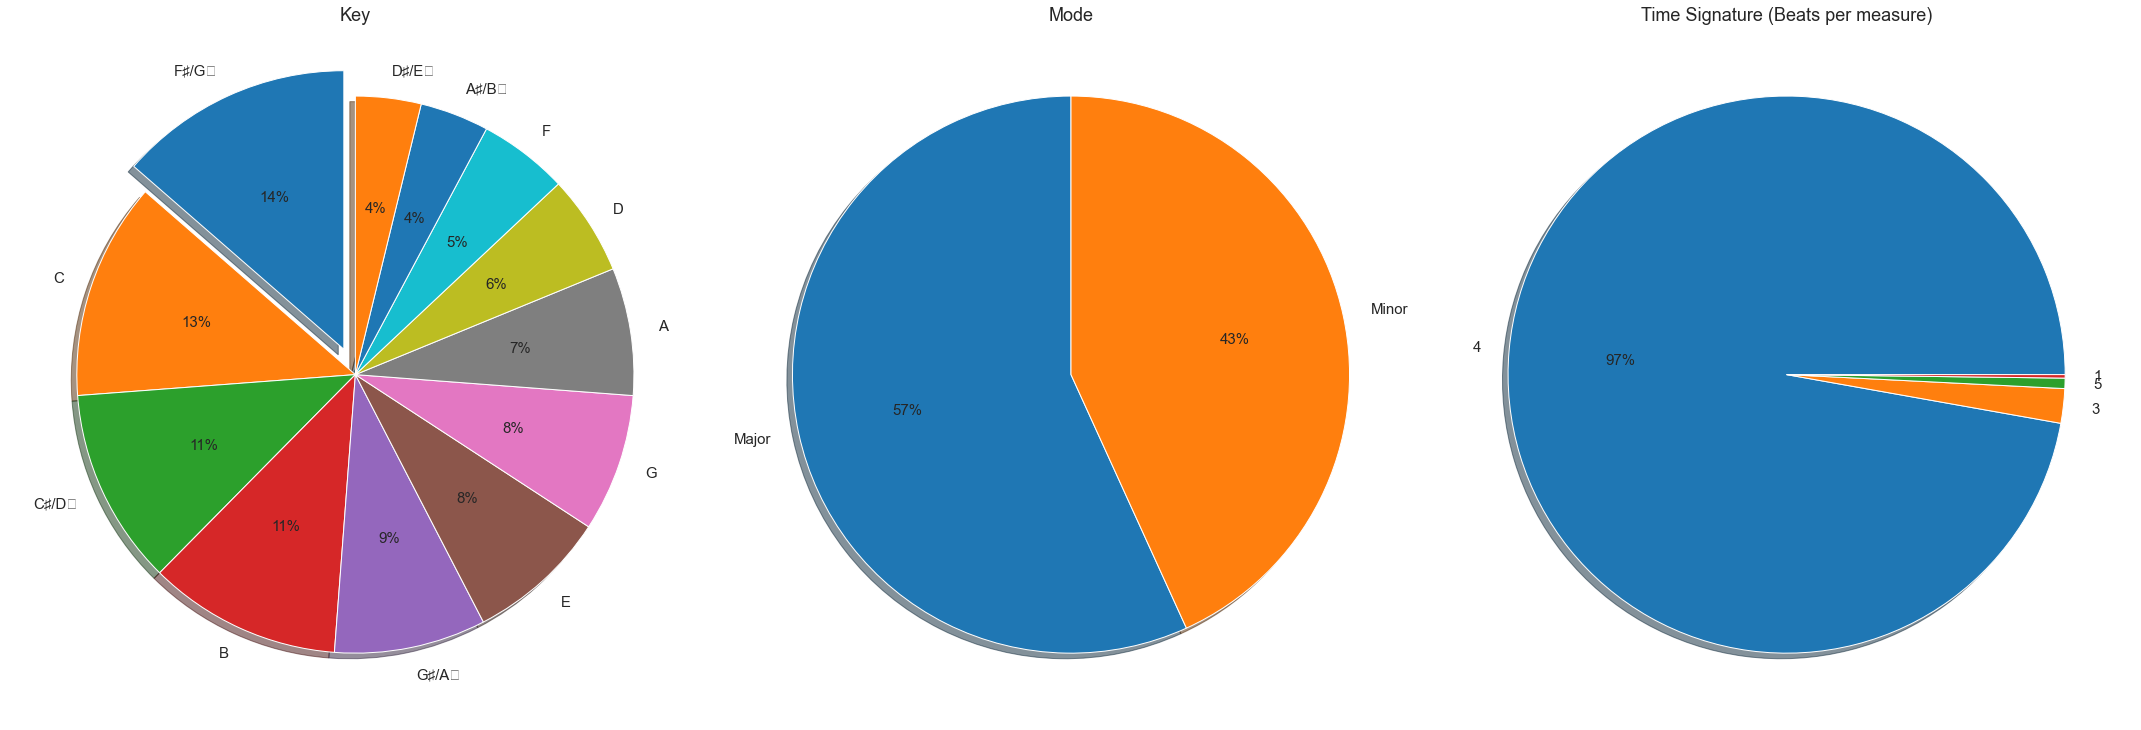

In [166]:
import matplotlib as mpl

def custom_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 20 else ''

mpl.rcParams['font.size'] = 15.0
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
key_explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
mode_explode = (0.1, 0.0)
#change colors pls
ax1.pie(complete_list['key'].value_counts(), labels = complete_list['key'].value_counts().index, startangle = 90, shadow = True, explode = key_explode, autopct='%1.0f%%')
ax1.set_title("Key Signature")
ax2.pie(complete_list['mode'].value_counts(), labels = complete_list['mode'].value_counts().index, startangle = 90, shadow = True, autopct='%1.0f%%')
ax2.set_title("Mode")
ax3.pie(complete_list['time_signature'].value_counts(), labels = complete_list['time_signature'].value_counts().index, startangle = 0, shadow = True, autopct=custom_autopct)
ax3.set_title("Time Signature (Beats per measure)")
plt.tight_layout()

## Visual Breakdown by Country

When we look at the playlist averages by country, we see that they are very similar to each other, indicating the possibility of similar musical characteristics beyond country borders.

In [115]:
radar_characteristics = ["danceability", "acousticness", "energy", "instrumentalness", "liveness", "loudness", "valence", "speechiness"]
avgs = no_duplicates_list.groupby("playlist").mean()[radar_characteristics]
avgs.T

playlist,Australia,Belgium,Brazil,Ecuador,Global,India,Japan,Spain,US,Vietnam
danceability,0.654235,0.699217,0.675500,0.742946,0.710060,0.613139,0.600875,0.753550,0.759529,0.657220
acousticness,0.225686,0.266183,0.361341,0.230917,0.214102,0.404551,0.194811,0.296270,0.165425,0.539605
energy,0.639824,0.663130,0.739205,0.683919,0.654760,0.601139,0.729729,0.699950,0.603118,0.531683
instrumentalness,0.020427,0.012944,0.000068,0.000842,0.000286,0.004072,0.000025,0.003699,0.000025,0.008858
liveness,0.146765,0.125035,0.369286,0.136678,0.175528,0.158603,0.203821,0.125365,0.168753,0.148476
loudness,0.617478,0.608646,0.674472,0.700514,0.635091,0.572893,0.687776,0.714541,0.604757,0.555500
valence,0.477824,0.524078,0.690841,0.623568,0.511086,0.500278,0.579979,0.694350,0.441059,0.430073
speechiness,0.075735,0.153187,0.123891,0.157905,0.120634,0.078114,0.063285,0.135535,0.125788,0.069720


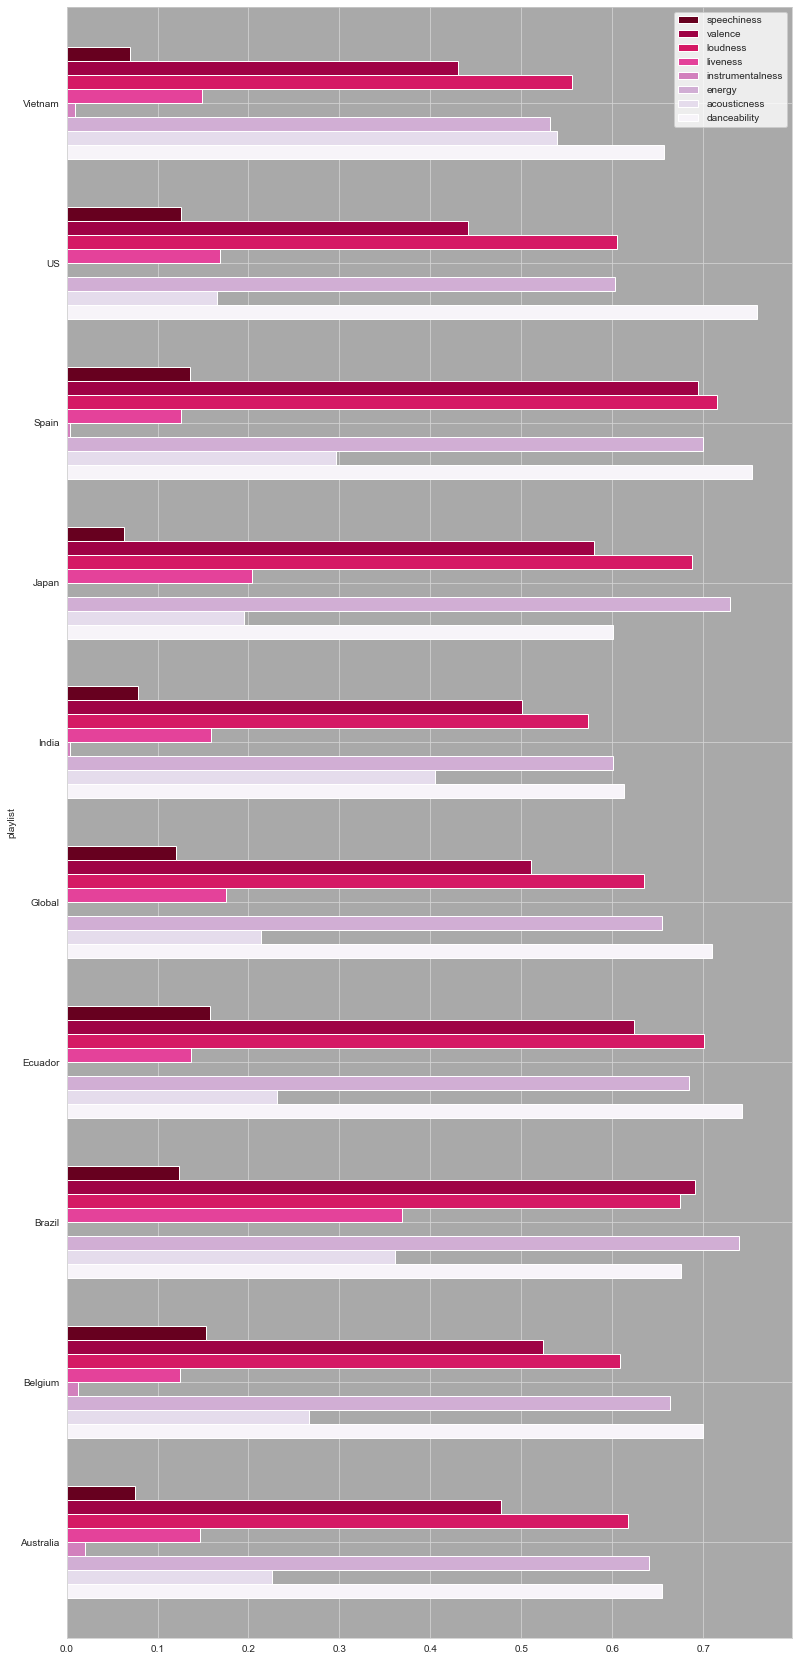

In [116]:
ax = avgs.plot(kind = "barh", width = 0.7, figsize=(13,30), cmap = "PuRd", legend = "reverse")
ax.set_facecolor('darkgray')
ax.set_axisbelow(True)
ax.grid(color='lightgray')


## Correlation Maps

<AxesSubplot:>

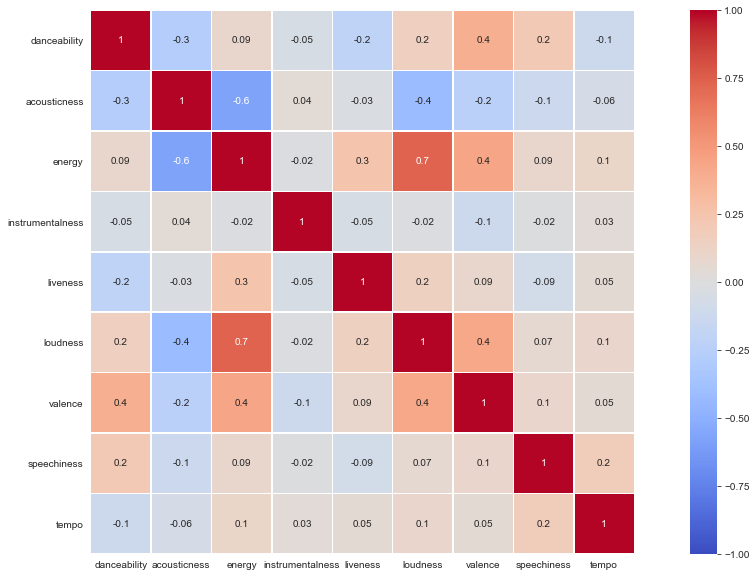

In [117]:
plt.figure(figsize = (20,10))
sns.heatmap(characteristics.corr(), annot = True, fmt='.1g', vmin = -1, vmax = 1, linewidths=0.5, square = True, cmap = "coolwarm")

### Energy x Loudness

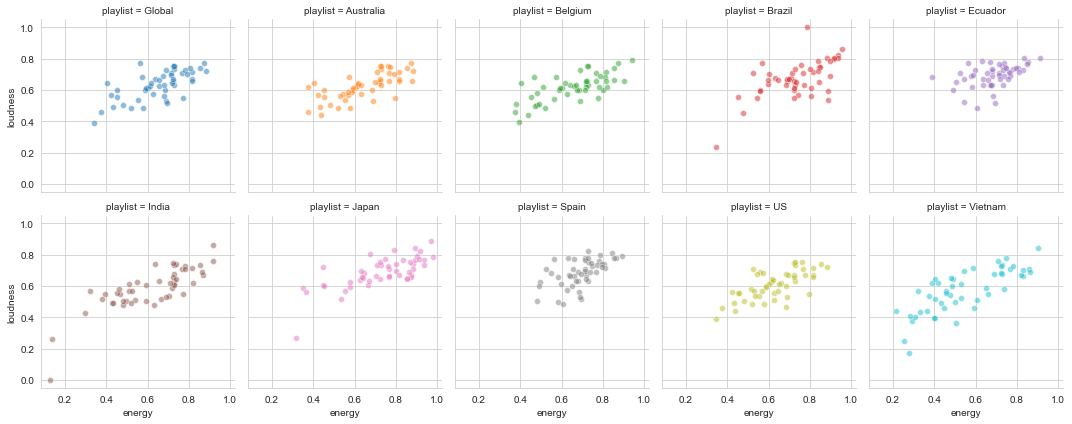

In [118]:
g = sns.FacetGrid(complete_list, col="playlist", hue = "playlist", col_wrap=5, height=3)
g.map(sns.scatterplot, "energy", "loudness", alpha=.5)

### Energy x Valence

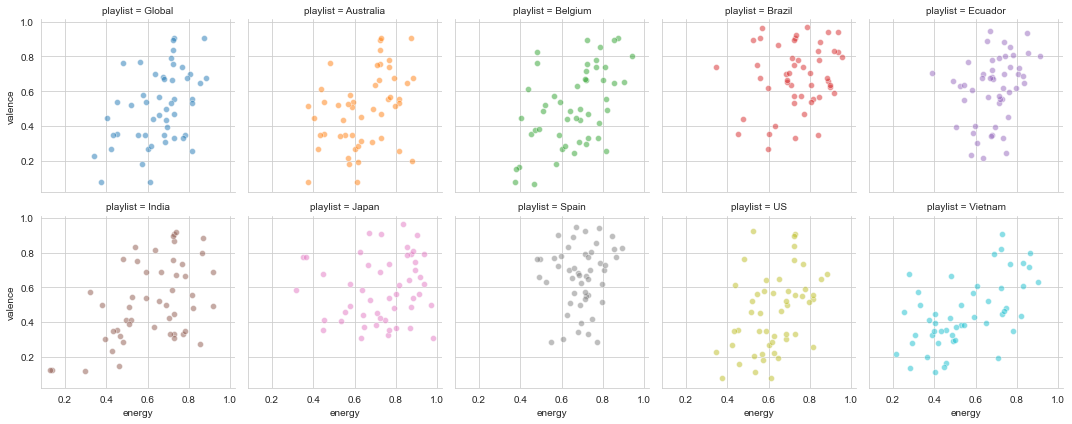

In [119]:
g = sns.FacetGrid(complete_list, col="playlist", hue = "playlist", col_wrap=5, height=3)
g.map(sns.scatterplot, "energy", "valence", alpha=.5)

### Valence x Danceability

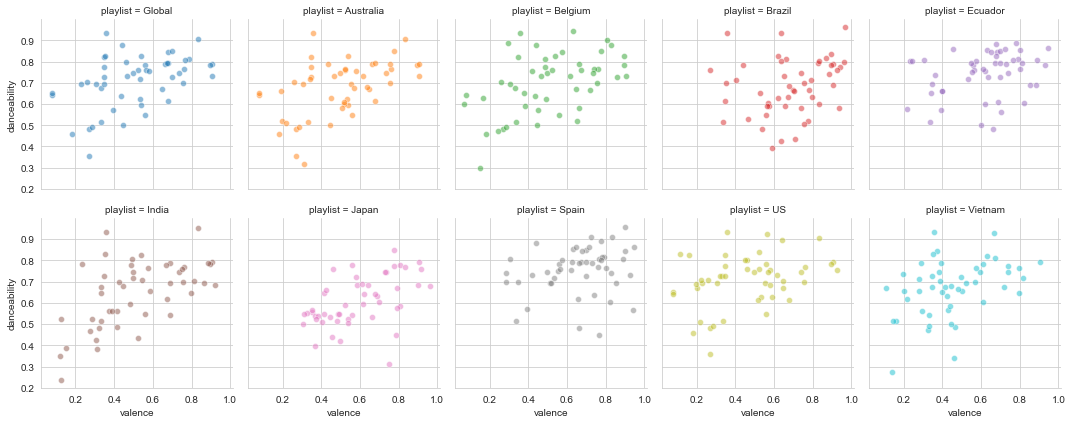

In [120]:
g = sns.FacetGrid(complete_list, col="playlist", hue = "playlist", col_wrap=5, height=3)
g.map(sns.scatterplot, "valence", "danceability", alpha=.5)

## Popularity Score

Popularity for Spotify is determined by the number of streams and the recency of the streams, but I wondered if you there is some relationship between the popularity of a song and the characteristics of a song through a multiple regression model. I also wanted to see the breakdown of the popularity by country. In line with the plot below, spotify has a diverse user base that streams their music from all different countries as most of songs on these Top 50 playlists are fairly popular.

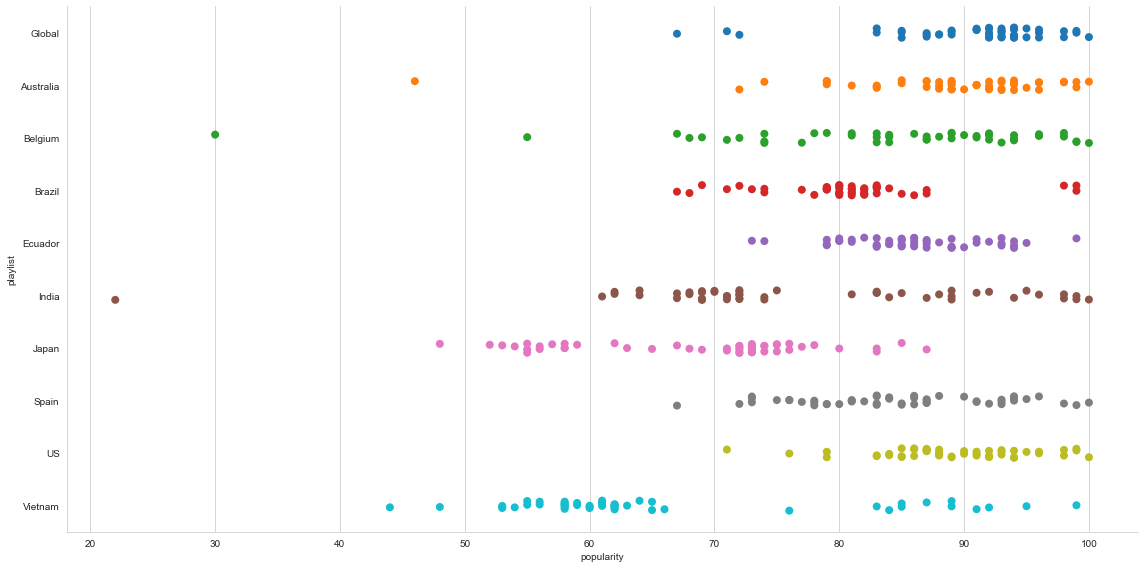

In [112]:
sns.catplot(x="popularity", y="playlist", data=complete_list, height = 8, aspect = 2, s = 8)

In [82]:
import statsmodels.api as sm
from sklearn import preprocessing

pop = complete_list.iloc[:, 5:14]
X = pop.iloc[:, 1:]
Y = pop['popularity']

model = sm.OLS(Y, X).fit() 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1989.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:00:11   Log-Likelihood:                         -2039.6
No. Observations:                 500   AIC:                                      4095.
Df Residuals:                     492   BIC:                                      4129.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Despite the high R-squared values, it seems we have issues of multicollinearity. Looking at the VIF for the predictor variables:

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_score(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [86]:
vif_score(X)

,variables,VIF
0,danceability,22.762069
1,acousticness,2.310045
2,energy,51.943181
3,instrumentalness,1.029529
4,liveness,2.565895
5,loudness,67.996935
6,valence,10.667443
7,speechiness,2.630969


Earlier from the correlation matrix, we saw that energy and loudness were highly correlated. It's further confirmed here where both have very high VIF scores. We should make the conscious choice to drop the energy variable since it's not significant in the model. Also, let's drop the instrumentalness variable due to the lack of significance as well.

In [99]:
X_2 = X.drop(["energy", "instrumentalness"], axis = 1)
print(vif_score(X_2))

model_2 = sm.OLS(Y, X_2).fit() 
print(model_2.summary())

      variables        VIF
0  danceability  22.753904
1  acousticness   1.926971
2      liveness   2.429626
3      loudness  23.068222
4       valence  10.304594
5   speechiness   2.628595
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2628.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:14:37   Log-Likelihood:                         -2042.8
No. Observations:                 500   AIC:                                      4098.
Df Residuals:                     494   BIC:                                      4123.
Df Model:                           6                                                  
Covariance Type:   

Since there is still multicollinearity, we need to drop danceabilit or loudness and valence as well. The following model was the best result in limiting multicoliinearity while preserving a high R-squared value and a lower AIC.

In [100]:
X_3 = X_2.drop(["valence", "loudness"], axis = 1)
print(vif_score(X_3))

model_3 = sm.OLS(Y, X_3).fit() 
print(model_3.summary())

      variables       VIF
0  danceability  4.682582
1  acousticness  1.890538
2      liveness  2.127236
3   speechiness  2.625794
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2813.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:16:51   Log-Likelihood:                         -2125.0
No. Observations:                 500   AIC:                                      4258.
Df Residuals:                     496   BIC:                                      4275.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                         

## Adjustments/Corrections

Obviously, there are plenty of flaws with this model. The first being that I only analyzed 10 playlists of music when there are millions of songs out there. I sadly have limited storage and processing power to evaluate huge sets of data. Moreover, popularity is a subjective measure that is dependent on many factors beyond just these characteristics determined by Spotify. For example, songs can simply have more streams by effect of the promotional material on Spotify's home page or the inclusion of a song in a popular playlist. I just wanted to explore if there was a possible relationship between the features of the song and the popularity and the model suggests that there is. 